### Representação matricial

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por: $$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$

 sendo $$W_N = e^{-j\frac{2\pi}{N}}.$$


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [34]:
def dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W


Para um determinado $k$ temos

$$X[k] = x(0)e^{-j\frac{2\pi.k.0}{N}} + x(1)e^{-j\frac{2\pi.k.1}{N}} + ... + x(N-1)e^{-j\frac{2\pi.k.(N-1)}{N}}$$
que pode ser escrita como
$$X[k] = \begin{bmatrix}1 & e^{-j\frac{2\pi.k}{N}} & ... & e^{-j\frac{2\pi.k.(N-1)}{N}}\end{bmatrix}\begin{bmatrix}x(0) \\ x(1) \\ x(2) \\ ... \\ x(N-1)\end{bmatrix}$$
estendendo essa representação pra todos os valore de $k$ obtemos
$${\bf X} = \begin{bmatrix} 1 & 1 & 1 & ... & 1 \\1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi.2}{N}} & ... & e^{-j\frac{2\pi.(N-1)}{N}} \\ ... \\ 1 & e^{-j\frac{2\pi(N-1)}{N}} & e^{-j\frac{2\pi.2(N-1)}{N}} & ... & e^{-j\frac{2\pi.(N-1)(N-1)}{N}}\end{bmatrix}\begin{bmatrix} x(0) \\ x(1) \\ ... \\ X(N-1) \end{bmatrix}$$

Vantagem: útil em sistemas baseados em representação matricial, Ex. MATLAB, hardware dedicado.

Desvantagem: Armazenamento da matriz.


In [35]:
def dft(x):
    N = len(x)
    W = dft_matrix(N)
    return np.dot(W, x)

In [36]:
# Função para gerar um sinal de teste
def gerar_sinal(N):
    n = np.arange(N)
    x = np.sin(2 * np.pi * n / N) + 0.5 * np.sin(4 * np.pi * n / N)
    return x

Observando o desenvolvimento acima, vemos que para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$, cujo comportamento está ilustrado no gráfico abaixo.

In [37]:
# Medir o tempo de execução para diferentes tamanhos de DFT (N)
tamanhos = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
t_execucao = []

for N in tamanhos:
    x = gerar_sinal(N)
    
    t_comeco = time.time()
    X = dft(x)
    t_fim = time.time()
    
    t_execucao.append(t_fim - t_comeco)

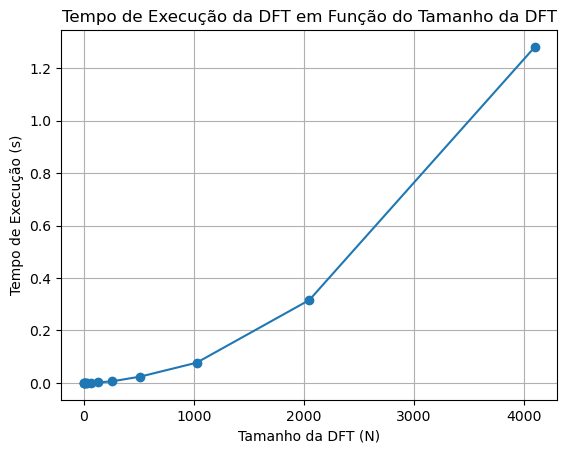

In [39]:
# Plotar o tempo de execução em função do tamanho da DFT (N)
plt.figure()
plt.plot(tamanhos, t_execucao, marker='o')
plt.xlabel('Tamanho da DFT (N)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Tempo de Execução da DFT em Função do Tamanho da DFT')
plt.grid(True)
plt.show()